In [2]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
df = pd.read_csv('./../../data/GCP/budget.csv')
df.head()

,Year,fossil fuel and industry,land-use change emissions,atmospheric growth,ocean sink,land sink,budget imbalance
0,1959,2.453378,1.810588,2.0352,0.852376,0.516073,0.860316
1,1960,2.568376,1.672592,1.5052,0.819017,1.394030,0.522722
2,1961,2.579724,1.607579,1.6536,0.714842,0.605098,1.213762
3,1962,2.685099,1.566764,1.1872,0.756709,1.348349,0.959605
4,1963,2.832715,1.513809,1.2084,0.904997,0.877794,1.355333


In [4]:
year = df['Year']
atmg = df['atmospheric growth']
os = df['ocean sink']
ls = df['land sink']

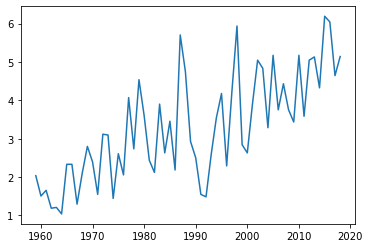

In [5]:
plt.plot(year, atmg)

In [6]:
atmg.shape

(60,)

# Autocorrelation of atmg

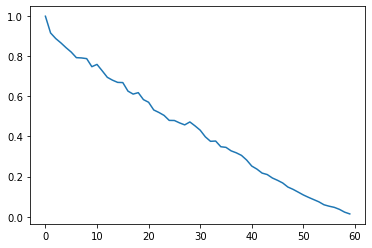

In [7]:
result = np.correlate(atmg, atmg, mode='full')
result = result[result.size // 2:]
plt.plot(result/result[0])

In [8]:
pd.DataFrame([year, result/result[0]]).T.head()

,Year,Unnamed 0
0,1959.0,1.000000
1,1960.0,0.916603
2,1961.0,0.888679
3,1962.0,0.867047
4,1963.0,0.843102


In [9]:
# Decorrelation time at 2002, so:
dec_time = 2002-1959
# and so there are the following independent samples:
round(year.size/dec_time)

1

## Generator to produce equally-sized chunks

In [10]:
def chunks(l, n):
    """Yield successive n-sized chunks from l."""
    for i in range(0, len(l), n):
        yield l[i:i + n]

# Split atm-growth into two 30 year periods

In [11]:
atmg_30 = list(chunks(atmg,30))

In [12]:
mean_atmg_30 = []
for i in atmg_30:
    mean_atmg_30.append(np.mean(i))
mean_atmg_30

[2.5955866666666667, 3.984506666666666]

In [13]:
std_atmg_30 = []
for i in atmg_30:
    std_atmg_30.append(np.std(i))
std_atmg_30

[1.1293411104808955, 1.2507582635967494]

# Split atm-growth into six 10 year periods

In [14]:
atmg_10 = list(chunks(atmg,10))

In [15]:
mean_atmg_10 = []
for i in atmg_10:
    mean_atmg_10.append(np.mean(i))
mean_atmg_10

[1.66844,
 2.5864000000000003,
 3.5319200000000004,
 3.11852,
 3.9644000000000004,
 4.8706000000000005]

In [16]:
std_atmg_10 = []
for i in atmg_10:
    std_atmg_10.append(np.std(i))
std_atmg_10

[0.4698610671251663,
 0.742726501479515,
 1.1477876570167498,
 1.3010462626670891,
 0.848688720320943,
 0.8629578205219535]

# Split atm-growth into twelve 5 year periods

In [17]:
atmg_5 = list(chunks(atmg, 5))

In [18]:
mean_atmg_5 = []
for i in atmg_5:
    mean_atmg_5.append(np.mean(i))
mean_atmg_5

[1.51792,
 1.81896,
 2.59064,
 2.58216,
 3.3199200000000006,
 3.74392,
 2.20904,
 4.0280000000000005,
 3.84992,
 4.07888,
 4.4732,
 5.268000000000001]

# Plot of atmg and means

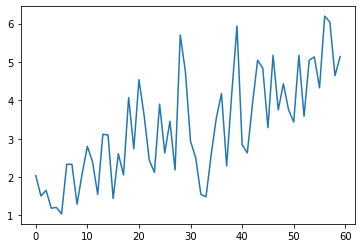

In [19]:
plt.plot(atmg)

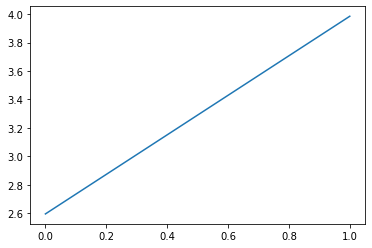

In [20]:
plt.plot(mean_atmg_30)

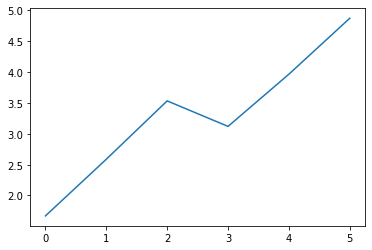

In [21]:
plt.plot(mean_atmg_10)

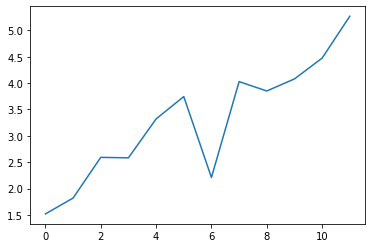

In [22]:
plt.plot(mean_atmg_5)

# Split ocean sink


In [23]:
os_10 = list(chunks(os,10))

In [24]:
mean_os_10 = []
for i in os_10:
    mean_os_10.append(np.mean(i))
mean_os_10

[0.9930116461299999,
 1.3127095801700002,
 1.68009864819,
 1.9393923447900001,
 2.08456973721,
 2.4803356927899998]

In [25]:
std_os_10 = []
for i in os_10:
    std_os_10.append(np.std(i))
std_os_10

[0.20026617242368702,
 0.1342375372957473,
 0.1452545119735512,
 0.1270030822323599,
 0.14900317826591283,
 0.12724592771762513]

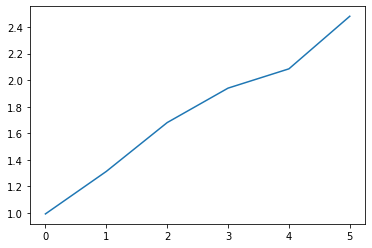

In [26]:
plt.plot(mean_os_10)

# Split land sink

In [27]:
ls_10 = list(chunks(ls,10))

In [28]:
mean_ls_10 = []
for i in ls_10:
    mean_ls_10.append(np.mean(i))
mean_ls_10

[1.20025254386,
 1.96200307298,
 1.6033397610999998,
 2.3500491922000006,
 2.8015347234799997,
 3.13529518972]

In [29]:
std_ls_10 = []
for i in ls_10:
    std_ls_10.append(np.std(i))
std_ls_10

[0.5990654365952037,
 1.116723490126156,
 0.9108881844760851,
 0.7134988619274928,
 0.9479777728122143,
 0.6921369604593314]

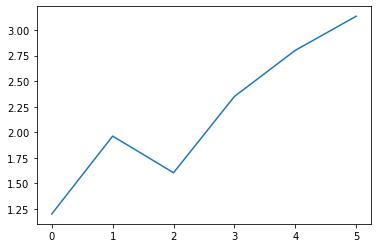

In [30]:
plt.plot(mean_ls_10)